In [1]:
import mapd_renderer
import ibis
import altair as alt
from vega_datasets import data

In [2]:
TABLE_NAME = "gapminder_health_income"

In [3]:
conn = ibis.mapd.connect(host='qs-dev.mapd.com', port='9092', 
    user='mapd', password='HyperInteractive', 
    database='mapd', protocol='http')

In [4]:
conn.table(TABLE_NAME)

DatabaseTable[table]
  name: gapminder_health_income
  schema:
    country : string
    income : int64
    health : double
    population : int64

In [5]:
t = conn.table(TABLE_NAME)
expr = t[
    ibis.row_id(),
    t.income,
    t.health,
    t.population,
]

In [6]:
def chart(source):
    return alt.Chart(source).mark_circle(fill='#800000', opacity=0.1).encode(
        alt.X(
            'income:Q',
            scale=alt.Scale(type='log', domain=[100,100000], range='width')
        ),
        alt.Y(
            'health:Q',
            scale=alt.Scale(type='linear', domain=[45,85], range='height')
        ),
        alt.Size(
            'population:Q',
            scale=alt.Scale(type='log',domain=[100, 20000])

        )
    )

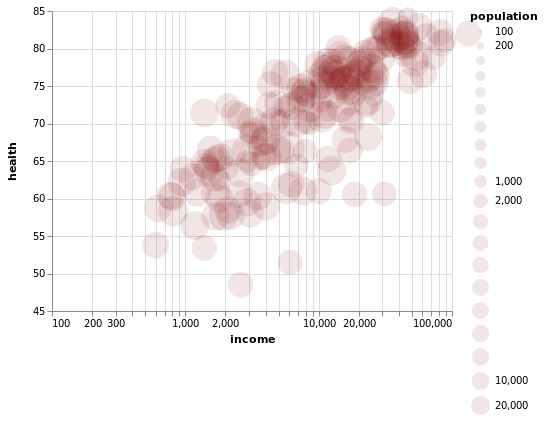

In [7]:
alt.renderers.enable('default')
chart(expr.execute())

In [8]:
alt.renderers.enable('mapd', conn=conn)
chart(expr.compile())